# DS 2500 – Module Assignment 01:

#Exploratory Data Analysis on Health Insurance Costs


Author : Prachi Aswani

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm, t, gamma, probplot

import numpy as np
import pandas as pd

# 1. Data Analysis Question

How does the Body Mass Index of a person have an impact on health insurance costs?

# 2. Read in your data

From GitHub Health Insurance Costs

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pauline177/DataScience2500/main/insurance.csv')

# 3. Check the packaging

In [ ]:
df.shape

(1338, 7)

# 4. Look at the top and bottom of data

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# 5. Check the "n"s

Around 574 people should not have any children.

In [ ]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

There should be 548 unique values of BMI in the set.

The presence of 548 unique values suggests variability in BMI measurements, with individuals having different BMI values.

In [ ]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [ ]:
len(set(df['age']))

47

There should 274 smokers in the dataset.

In [ ]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

There should be 4 regions in the set.

In [ ]:
len(set(df['region']))

4

# 6. Validate against an external data source

The data should contain more males

In [ ]:
df['sex'].value_counts().head(20)

sex
male      676
female    662
Name: count, dtype: int64

Number of regions

In [ ]:
region_df = df[df['region'] == "northwest"]
len(region_df)

325

Overall costs of health insurances

In [ ]:
'${:,.2f}'.format(df['charges'].sum())

'$17,755,824.99'

Is the distribution of charges typical?

In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In conclusion, the distribution of charges is not typical in the sense that it is right-skewed, indicating a concentration of charges toward the lower end with a few high-value charges. The presence of outliers contributes to the higher mean and standard deviation

# 7. Make a plot

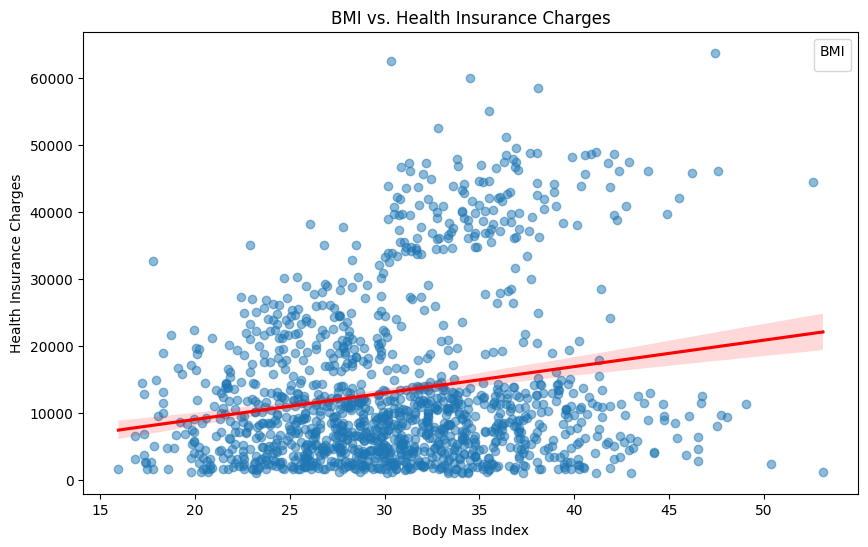

In [ ]:
plt.figure(figsize=(10, 6))
sb.regplot(x='bmi', y='charges', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BMI vs. Health Insurance Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Health Insurance Charges')
plt.legend(title='BMI', loc='upper right')
plt.show()

# 8. Try an easy solution

Normal test

Normal Probabilit Plot

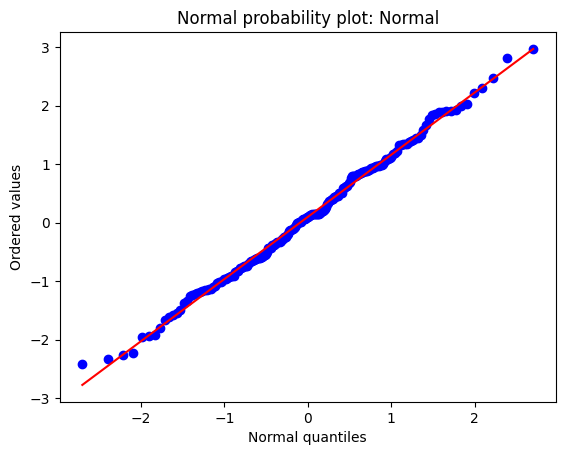

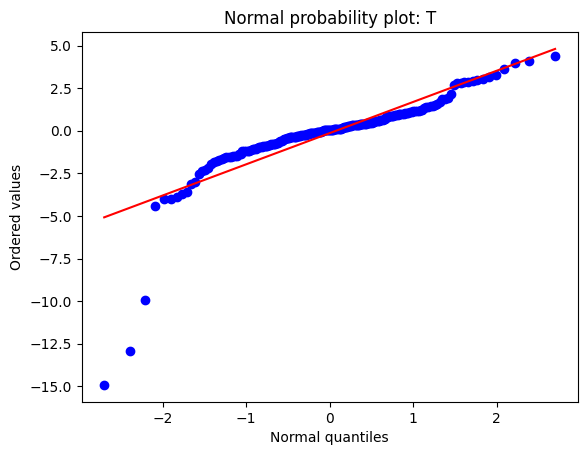

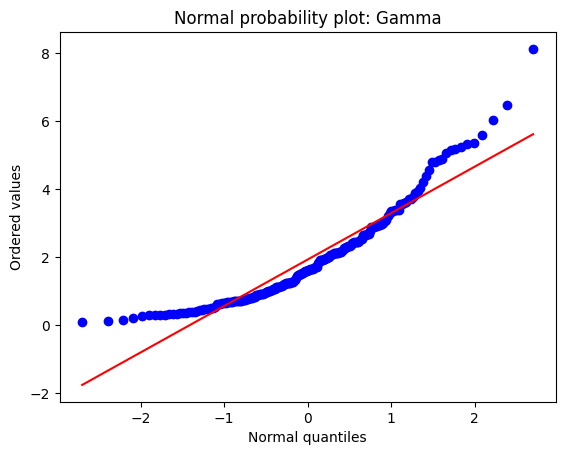

In [ ]:
samp_size = 200

x = norm.rvs(loc=0, scale=1, size=samp_size)
probplot(x, plot=plt)
plt.title("Normal probability plot: Normal")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

x = t.rvs(df=3,size=samp_size)
probplot(x, plot=plt)
plt.title("Normal probability plot: T")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()

from scipy.stats import gamma
x = gamma.rvs(a=2,size=samp_size)
probplot(x, plot=plt)
plt.title("Normal probability plot: Gamma")
plt.xlabel("Normal quantiles")
plt.ylabel("Ordered values")
plt.show()


#Pearson's Correlation Coefficient


Are these statistically important?


Hypothesis testing using Pearson Correlation Coefficient

Two Tailed Test
$$
H_0: \text{No correlation between no. of children and charges, i.e., $p=0$}.
$$
$$
H_a: \text{Some correlation between no. of children and charges, i.e., $p≠0$}.
$$

Significance level is 5%(0.05)

In [ ]:
from scipy.stats import pearsonr

# Extract relevant columns
charges = df['charges']
bmi = df['bmi']

# Perform Pearson correlation
correlation, p_value = pearsonr(charges, bmi)

# Display results
print('Correlation: {}'.format(correlation))
print('P value: {}'.format(p_value))


Correlation: 0.1983409688336288
P value: 2.459085535116766e-13


From my correlation coefficient (r), The correlation coefficient is approximately
0.1983, indicating a weak positive correlation between BMI (Body Mass Index) and health insurance charges.
The positive sign suggests that as BMI increases, health insurance charges tend to increase, but the correlation is not very strong. The result is weak, because the magnitude is not close to 1.The p-value associated with the correlation coefficient is extremely small and less than 0.05. This very small p-value indicates strong evidence against the null hypothesis. Hence, we reject the null hypothesis

#**Write Up**
Exploratory Data Analysis on Health Insurance Costs:

The choice of the health insurance costs dataset was motivated by several factors. Firstly, health insurance is a topic of universal relevance, impacting individuals and societies worldwide. Analyzing the factors influencing health insurance costs provides valuable insights into the healthcare system, financial considerations, and individual health outcomes. Secondly, the dataset offers a rich array of variables, including demographic information such as age, sex, BMI, smoking status, and region, along with health insurance charges. This diversity of variables allows for a comprehensive analysis of the factors influencing insurance costs.

The data analysis question is How does the Body Mass Index of a person have an impact on health insurance costs? This question aligns with the dataset on Health Insurance Costs. The dataset contains information on various demographic and health-related variables, including BMI and health insurance charges. By examining the relationship between BMI and insurance costs within this dataset, we can explore how individual health metrics, specifically BMI, influence the financial aspects of healthcare. This question leverages the availability of relevant variables in the dataset to gain insights into the connection between personal health factors and insurance expenses, making it well-suited for analysis within this dataset. Upon loading the dataset from a GitHub repository, it was found to consist of 1338 rows and 7 columns, providing an initial grasp of its size and dimensions. Subsequently, examining the first and last few rows offered a glimpse into the dataset's structure and values.

Furthermore I analyzed various aspects of the dataset, including the distribution of BMI values, the frequency of age groups, and the number of smokers and regions represented. Such explorations provided with valuable insights into the diversity and characteristics of the data.Validating the dataset against an external data source enhanced its credibility and reliability, I checked with my external knowledge stuff like, if there were 4 regions in the dataset and if there were more men then women etc.
I also did summary of statistics which sheds light on the distribution of health insurance charges, indicating a right-skewed pattern with a concentration towards lower values and a few outliers contributing to higher charges.
The visualization I chose for exploring the relationship between Body Mass Index (BMI) and health insurance charges is a regression plot.Firstly, a regression plot allowed me to visually assess the presence and strength of any linear relationship between two continuous variables, which in this case are BMI and insurance charges. By plotting the data points and fitting a regression line, I could visually identify any patterns or trends in the relationship.Secondly, the plot provided a clear representation of the data distribution and the regression line, making it easy to interpret the relationship between BMI and insurance charges. The scatterplot of data points helped visualize the spread of observations across different BMI values and their corresponding insurance charges, while the regression line provided a concise summary of the overall trend. The plot I did clearly indicates there's a weak relationship between BMI and insurance costs

Next, I did a normal probablility plot to check if my data was normally distributed. I did normal probability plots for different distributions, including Normal, T, and Gamma, as it serves as a diagnostic tool to assess the normality of the data distribution.Finally, I went on to do a statisctical hypothesis test. I chose Pearson correlation coefficient to quantify the strength and direction of the linear relationship between BMI and insurance charges. Pearson's correlation measured the degree to which changes in one variable (BMI) corresponded to changes in another variable (insurance charges). From my correlation coefficient (r), The correlation coefficient is approximately 0.1983, indicating a weak positive correlation between BMI (Body Mass Index) and health insurance charges.
The positive sign suggests that as BMI increases, health insurance charges tend to increase, but the correlation is not very strong. The result is weak, because the magnitude is not close to 1. Additionally, because the p-value is less than 0.05, we can say that there is not a statistically significant correlation between the BMI and insurance costs.There is a very weak positive realtion between BMI and cost. Hence we reject the null hypothesis.In summary, each step of the exploratory data analysis process contributed to a deeper understanding of the dataset and its underlying relationships. From data loading and overview to visualization and statistical analysis, each component played a crucial role in unraveling insights and informing subsequent analyses or decision-making processes.


Data Ethics Canvas Usefulness:

For the Health Insurance Costs Dataset:

In the context of the Health Insurance Costs dataset, the Data Ethics Canvas serves as a valuable tool for ensuring ethical considerations are addressed throughout the data analysis process. Privacy emerges as an important concern, particularly concerning sensitive information such as BMI, age, and personal details. By following privacy protocols, we can ensure that individuals' information is handled responsibly and anonymously, safeguarding their privacy rights. Bias mitigation is another critical aspect addressed by the Data Ethics Canvas. Given the dataset's breadth, including variables such as age, sex, and region, there's a risk of inherent biases influencing the analysis. By proactively identifying and addressing biases, such as potential disparities in health insurance charges across demographics, we can strive for fairness and equity in the findings. Transparency is fundamental to maintaining trust and accountability in data analysis processes. The Data Ethics Canvas prompts practitioners to communicate clearly about data sources, methodologies, and potential limitations. By being this transparent, we can provide insights into the data's origins, analytical methods employed, and any constraints or uncertainties associated with the findings.

For Another Data-Driven Problem:

I would consider the use of facial recognition technology by law enforcement agencies. This technology raises significant ethical concerns regarding privacy, bias, and transparency.
Privacy is a major concern in the context of facial recognition technology, as it involves capturing and analyzing individuals' biometric data without their consent. By using the Data Ethics Canvas, stakeholders can evaluate how to ensure that individuals' privacy rights are respected, perhaps by implementing strict protocols for data anonymization and consent. Bias is another critical issue, as facial recognition algorithms have been shown to exhibit racial and gender biases, leading to disparities in accuracy across demographic groups. Through the Data Ethics Canvas, stakeholders can identify potential biases in the data used to train these algorithms and explore methods to mitigate them, such as diverse and representative training datasets.Transparency is essential for building trust and accountability in the deployment of facial recognition technology. The Data Ethics Canvas encourages stakeholders to be transparent about how facial recognition systems are used, the algorithms employed, and the potential limitations or risks associated with their use. This transparency can foster informed public discourse and help ensure that facial recognition technology is deployed ethically and responsibly.